In [1]:
import fidA_io as fio
from fidA_processing import *

## Load and Plot Data

In [22]:
out1,ref1,infodict=fio.io_loadspec_bruk('data/6',try_raw=True)
out1.flags['addedrcvrs']=False
print(out1.sz)
print(out1.dims)
print(out1.flags)

(2048, 4, 250)
{'t': 0, 'averages': 2, 'subSpecs': -1, 'coils': 1, 'extras': -1}
{'getftshifted': False, 'filtered': False, 'zeropadded': False, 'freqcorrected': False, 'phasecorrected': False, 'addedrcvrs': False, 'subtracted': False, 'writtentotext': False, 'downsampled': False, 'avgNormalized': False, 'isFourSteps': False, 'writtentostruct': True, 'gotparams': True, 'averaged': False}


The data have 2048 time/frequency points, 4 coils and 250 averages. We will need to combine the data from the four receive coils, then average. First, let's look at the data.

/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


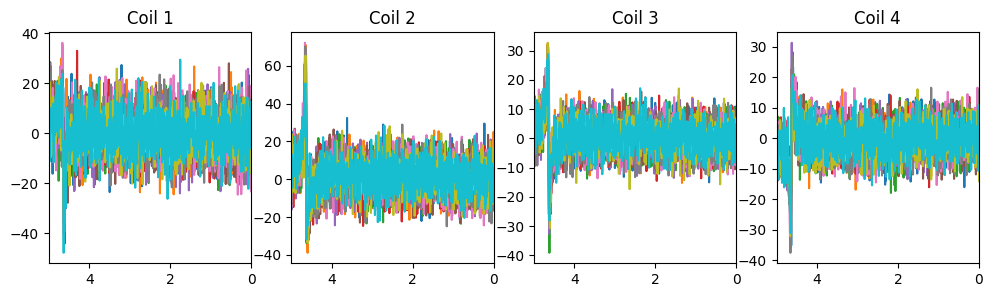

In [24]:
# Plot selected averages for each coil
f1,ax1=plt.subplots(1,4)
f1.set_size_inches([12,3])
for coil_count in range(out1.sz[out1.dims['coils']]):
    ax1[coil_count].plot(out1.ppm,out1.specs[:,coil_count,::25])
    ax1[coil_count].set_title('Coil {:g}'.format(coil_count+1))
    ax1[coil_count].set_xlim([5,0])

The data for the individual averages are very noisy. Only the water peak around 4.6 ppm is evident. However, the coil combination function will use the averages for each coil to calculate the phase and scaling parameters needed for combination.

## Combine Coils

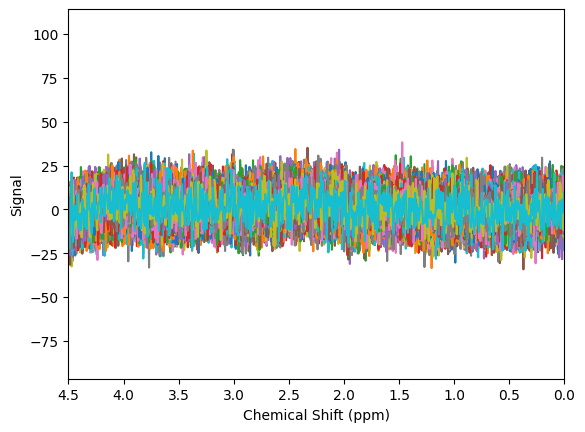

In [25]:
fid1_cc,fids_presum,specs_presum,coilcombos=op_addrcvrs(out1)
fid1_cc.plot_spec()

## Combine all 250 averages

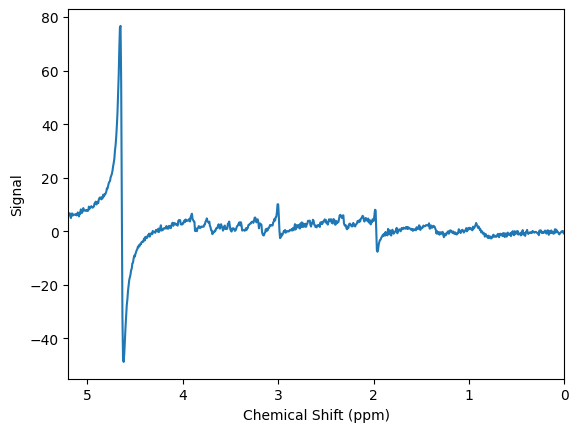

In [27]:
fid1_avg=op_averaging(fid1_cc)
fid1_avg.plot_spec([5.2,0])

The data are out of phase. We can select a peak to calculate the phase, for example creatine around 3 ppm or the water peak around 4.6 ppm.

-47.97552610864439 -76.41699286729131


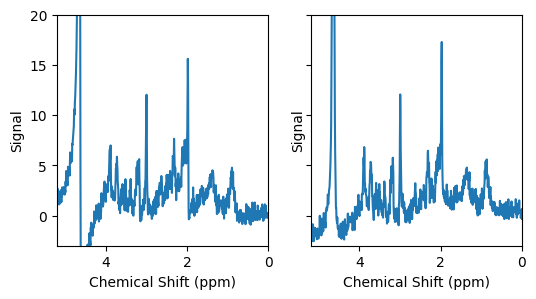

In [28]:
f1,ax1=plt.subplots(1,2,sharey=True)
f1.set_size_inches(6,3)
fid1_phased_Cr,ph1=op_autophase(fid1_avg,2.8,3.1)
fid1_phased_Cr.plot_spec(xlims=[5.2,0],plotax=ax1[0])
fid1_phased_water,ph2=op_autophase(fid1_avg,4.3,4.9)
fid1_phased_water.plot_spec(xlims=[5.2,0],plotax=ax1[1])
ax1[0].set_ylim([-3,20])
print(ph1,ph2)